# Boston Housing Dataset - Machine Learning Algorithms

This notebook applies our custom ML algorithms to the cleaned Boston Housing dataset.

## Table of Contents
1. [Setup & Data Loading](#setup)
2. [Regression Algorithms](#regression)
3. [Classification Version](#classification)
4. [Ensemble Methods](#ensemble)
5. [Dimensionality Reduction](#dimensionality)
6. [Model Comparison](#comparison)
7. [Results Analysis](#results)

## 1. Setup & Data Loading {#setup}

In [23]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
import pickle
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# Add scripts folder to path
sys.path.append('../scripts')

print("✅ Libraries imported successfully!")
print(f"✅ Scripts folder added to path: {os.path.abspath('../scripts')}")

✅ Libraries imported successfully!
✅ Scripts folder added to path: /home/therrshan/gitrepos/ml-scratch/scripts


In [24]:
# Import our custom ML algorithms
try:
    from linear_regression import LinearRegression
    print("✅ LinearRegression imported")
except ImportError as e:
    print(f"❌ Error importing LinearRegression: {e}")

try:
    from neural_network import NeuralNetwork
    print("✅ NeuralNetwork imported")
except ImportError as e:
    print(f"❌ Error importing NeuralNetwork: {e}")

try:
    from random_forest import RandomForest
    print("✅ RandomForest imported")
except ImportError as e:
    print(f"❌ Error importing RandomForest: {e}")

try:
    from xg_boost import XGBoost
    print("✅ XGBoost imported")
except ImportError as e:
    print(f"❌ Error importing XGBoost: {e}")

try:
    from kmeans import KMeans
    print("✅ KMeans imported")
except ImportError as e:
    print(f"❌ Error importing KMeans: {e}")

try:
    from pca import PCA
    print("✅ PCA imported")
except ImportError as e:
    print(f"❌ Error importing PCA: {e}")

✅ LinearRegression imported
✅ NeuralNetwork imported
✅ RandomForest imported
✅ XGBoost imported
✅ KMeans imported
✅ PCA imported


In [25]:
# Load the preprocessed data
try:
    X_train = pd.read_csv('../data/HousingProcessed/X_train.csv')
    X_test = pd.read_csv('../data/HousingProcessed/X_test.csv')
    y_train = pd.read_csv('../data/HousingProcessed/y_train.csv').values.ravel()
    y_test = pd.read_csv('../data/HousingProcessed/y_test.csv').values.ravel()
    
    # Load preprocessing info
    with open('../data/HousingProcessed/preprocessing_info.pkl', 'rb') as f:
        preprocessing_info = pickle.load(f)
    
    print("✅ Data loaded successfully!")
    print(f"Training set: {X_train.shape}")
    print(f"Test set: {X_test.shape}")
    print(f"Features: {len(preprocessing_info['feature_names'])}")
    
except FileNotFoundError as e:
    print(f"❌ Error loading data: {e}")
    print("Please run the data cleaning notebook first!")

✅ Data loaded successfully!
Training set: (404, 22)
Test set: (102, 22)
Features: 22


In [26]:
# Display data info
print("=== DATASET INFORMATION ===")
print(f"Features: {preprocessing_info['feature_names']}")
print(f"\nTarget statistics:")
print(f"Train - Mean: {y_train.mean():.2f}, Std: {y_train.std():.2f}, Range: [{y_train.min():.1f}, {y_train.max():.1f}]")
print(f"Test  - Mean: {y_test.mean():.2f}, Std: {y_test.std():.2f}, Range: [{y_test.min():.1f}, {y_test.max():.1f}]")

print(f"\nPreprocessing applied:")
for key, value in preprocessing_info['preprocessing_summary'].items():
    print(f"  {key}: {value}")

=== DATASET INFORMATION ===
Features: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'RM_Category', 'CRIM_Category', 'TAX_per_ROOM', 'DIS_RAD_Ratio', 'SOCIOECONOMIC_SCORE', 'ENV_QUALITY', 'HIGH_CRIME', 'OLD_BUILDING', 'LARGE_ROOMS']

Target statistics:
Train - Mean: 22.65, Std: 8.44, Range: [10.2, 43.4]
Test  - Mean: 21.37, Std: 7.60, Range: [10.2, 43.4]

Preprocessing applied:
  Original Shape: (506, 14)
  Final Shape: (506, 22)
  Missing Values: None found
  Outlier Treatment: clip
  Feature Engineering: 9 new features created
  Scaling Method: StandardScaler
  Train-Test Split: 404/102 (80%/20%)
  Random State: 42


## 2. Regression Algorithms {#regression}

Since Boston Housing is a regression problem (predicting house prices), we'll start with regression algorithms.

### 2.1 Linear Regression

=== LINEAR REGRESSION ===
Train RMSE: 3.6453
Test RMSE:  3.6001
Train R²:   0.8134
Test R²:    0.7756


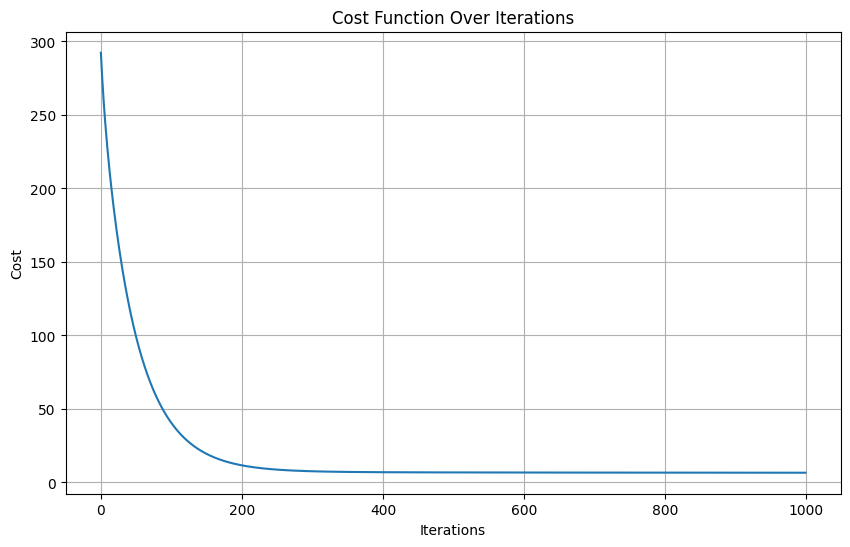

In [27]:
# Linear Regression
print("=== LINEAR REGRESSION ===")

lr_model = LinearRegression(learning_rate=0.01, max_iterations=1000)
lr_model.fit(X_train.values, y_train)

# Predictions
lr_train_pred = lr_model.predict(X_train.values)
lr_test_pred = lr_model.predict(X_test.values)

# Metrics
lr_train_rmse = np.sqrt(mean_squared_error(y_train, lr_train_pred))
lr_test_rmse = np.sqrt(mean_squared_error(y_test, lr_test_pred))
lr_train_r2 = r2_score(y_train, lr_train_pred)
lr_test_r2 = r2_score(y_test, lr_test_pred)

print(f"Train RMSE: {lr_train_rmse:.4f}")
print(f"Test RMSE:  {lr_test_rmse:.4f}")
print(f"Train R²:   {lr_train_r2:.4f}")
print(f"Test R²:    {lr_test_r2:.4f}")

# Plot training history
lr_model.plot_cost_history()

### 2.2 Neural Network Regression

=== NEURAL NETWORK REGRESSION ===
Iteration 0: Cost = 147.412572, Accuracy = -4.3723
Iteration 100: Cost = 35.926611, Accuracy = -0.0166
Iteration 200: Cost = 21.375252, Accuracy = 0.4168
Iteration 300: Cost = 4.346904, Accuracy = 0.8725
Iteration 400: Cost = 1.503816, Accuracy = 0.9554
Training completed. Final cost: 0.966478

Train RMSE: 1.3064
Test RMSE:  3.2810
Train R²:   0.9760
Test R²:    0.8136


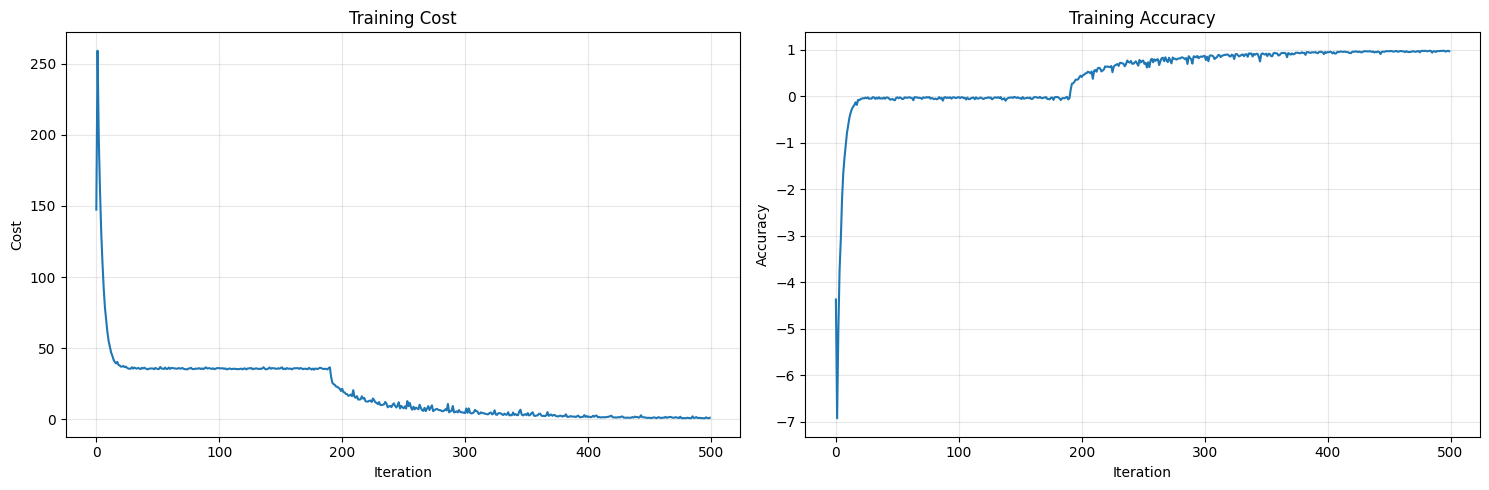

In [28]:
# Neural Network for Regression
print("=== NEURAL NETWORK REGRESSION ===")

nn_model = NeuralNetwork(
    layers=[X_train.shape[1], 32, 16, 8, 1],  # Input -> Hidden layers -> Output
    learning_rate=0.01,
    activation='relu',
    output_activation='linear',
    max_iterations=500,
    batch_size=32,
    regularization='l2',
    lambda_reg=0.001
)

nn_model.fit(X_train.values, y_train)

# Predictions
nn_train_pred = nn_model.predict(X_train.values)
nn_test_pred = nn_model.predict(X_test.values)

# Metrics
nn_train_rmse = np.sqrt(mean_squared_error(y_train, nn_train_pred))
nn_test_rmse = np.sqrt(mean_squared_error(y_test, nn_test_pred))
nn_train_r2 = r2_score(y_train, nn_train_pred)
nn_test_r2 = r2_score(y_test, nn_test_pred)

print(f"\nTrain RMSE: {nn_train_rmse:.4f}")
print(f"Test RMSE:  {nn_test_rmse:.4f}")
print(f"Train R²:   {nn_train_r2:.4f}")
print(f"Test R²:    {nn_test_r2:.4f}")

# Plot training history
nn_model.plot_training_history()

### 2.3 XGBoost Regression

=== XGBOOST REGRESSION ===
Training XGBoost with 100 rounds...
Round 10: train-rmse=3.878108, val-rmse=4.043721
Round 20: train-rmse=2.032003, val-rmse=3.353531
Round 30: train-rmse=1.255470, val-rmse=3.241529
Round 40: train-rmse=0.908941, val-rmse=3.193514
Round 50: train-rmse=0.698061, val-rmse=3.176847
Round 60: train-rmse=0.578710, val-rmse=3.138894
Round 70: train-rmse=0.457502, val-rmse=3.125207
Round 80: train-rmse=0.368222, val-rmse=3.107024
Round 90: train-rmse=0.293555, val-rmse=3.107874
Round 100: train-rmse=0.240889, val-rmse=3.111088
XGBoost training completed!

Train RMSE: 1.4096
Test RMSE:  2.7537
Train R²:   0.9721
Test R²:    0.8687


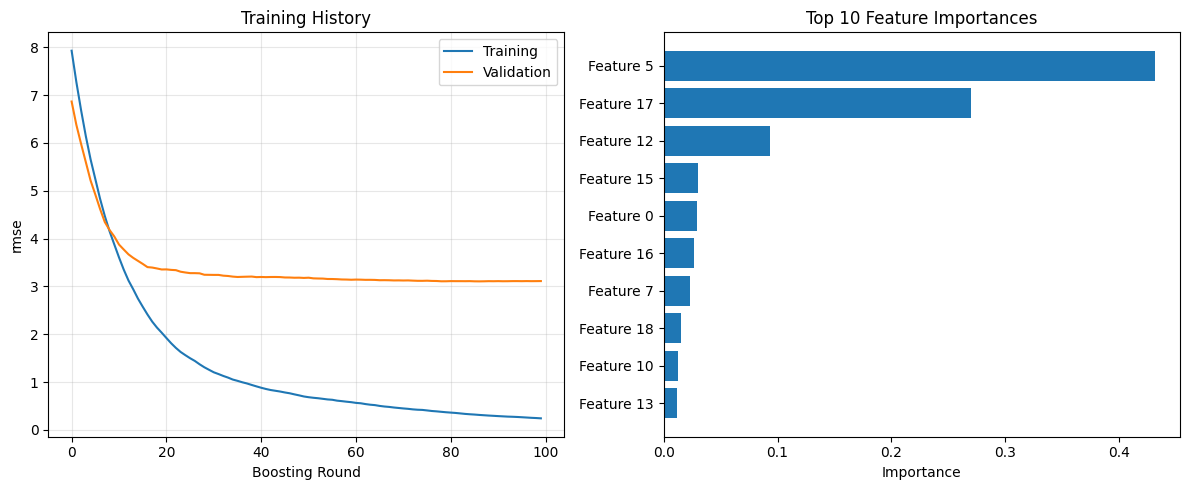

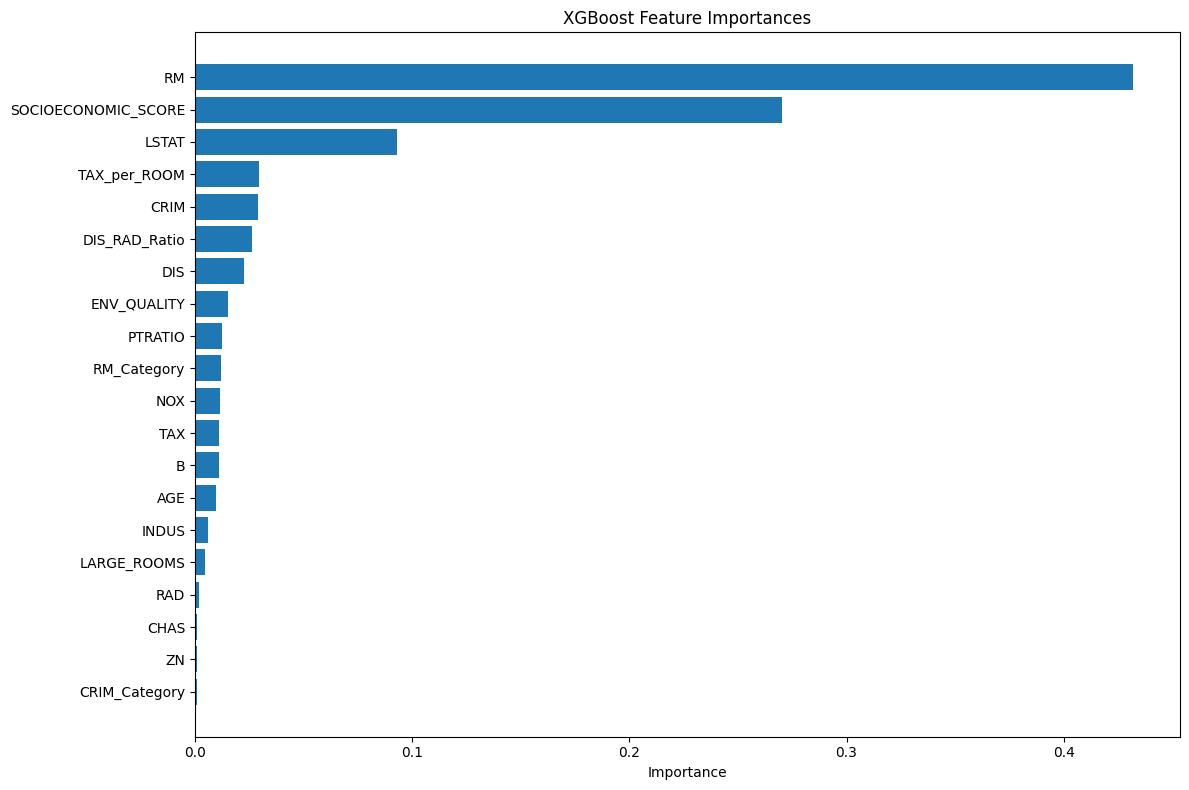

In [34]:
# XGBoost for Regression
print("=== XGBOOST REGRESSION ===")

xgb_model = XGBoost(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_lambda=1,
    objective='reg:squarederror',
    eval_metric='rmse',
    random_state=42
)

# Split training data for validation
val_split = int(0.8 * len(X_train))
X_train_sub = X_train[:val_split]
X_val = X_train[val_split:]
y_train_sub = y_train[:val_split]
y_val = y_train[val_split:]

xgb_model.fit(X_train_sub.values, y_train_sub, eval_set=(X_val.values, y_val))

# Predictions
xgb_train_pred = xgb_model.predict(X_train.values)
xgb_test_pred = xgb_model.predict(X_test.values)

# Metrics
xgb_train_rmse = np.sqrt(mean_squared_error(y_train, xgb_train_pred))
xgb_test_rmse = np.sqrt(mean_squared_error(y_test, xgb_test_pred))
xgb_train_r2 = r2_score(y_train, xgb_train_pred)
xgb_test_r2 = r2_score(y_test, xgb_test_pred)

print(f"\nTrain RMSE: {xgb_train_rmse:.4f}")
print(f"Test RMSE:  {xgb_test_rmse:.4f}")
print(f"Train R²:   {xgb_train_r2:.4f}")
print(f"Test R²:    {xgb_test_r2:.4f}")

# Plot training history and feature importances
xgb_model.plot_training_history()
xgb_model.plot_feature_importances(preprocessing_info['feature_names'])

## 3. Classification Version {#classification}

Let's convert the regression problem to classification by binning house prices.

In [30]:
# Convert regression to classification problem
# Create price categories: Low, Medium, High
def create_price_categories(prices):
    # Use quantiles to create balanced classes
    q33 = np.percentile(prices, 33)
    q67 = np.percentile(prices, 67)
    
    categories = np.zeros_like(prices, dtype=int)
    categories[prices <= q33] = 0  # Low
    categories[(prices > q33) & (prices <= q67)] = 1  # Medium
    categories[prices > q67] = 2  # High
    
    return categories, q33, q67

y_train_class, q33, q67 = create_price_categories(y_train)
y_test_class = np.zeros_like(y_test, dtype=int)
y_test_class[y_test <= q33] = 0
y_test_class[(y_test > q33) & (y_test <= q67)] = 1
y_test_class[y_test > q67] = 2

print("=== CLASSIFICATION VERSION ===")
print(f"Price categories:")
print(f"  Low (0):    ≤ ${q33:.1f}k")
print(f"  Medium (1): ${q33:.1f}k - ${q67:.1f}k")
print(f"  High (2):   > ${q67:.1f}k")

print(f"\nClass distribution:")
unique, counts = np.unique(y_train_class, return_counts=True)
for cls, count in zip(unique, counts):
    print(f"  Class {cls}: {count} samples ({100*count/len(y_train_class):.1f}%)")

=== CLASSIFICATION VERSION ===
Price categories:
  Low (0):    ≤ $18.9k
  Medium (1): $18.9k - $23.9k
  High (2):   > $23.9k

Class distribution:
  Class 0: 134 samples (33.2%)
  Class 1: 140 samples (34.7%)
  Class 2: 130 samples (32.2%)


### 3.2 XGBoost Classification

In [32]:
# For multi-class, we'll create binary classifiers (simplified approach)
print("=== XGBOOST CLASSIFICATION (One-vs-Rest) ===")

# Create binary classification models for each class
xgb_classifiers = []
classes = [0, 1, 2]

for cls in classes:
    print(f"\nTraining classifier for class {cls}...")
    
    # Convert to binary problem
    y_binary_train = (y_train_class == cls).astype(int)
    y_binary_test = (y_test_class == cls).astype(int)
    
    xgb_cls = XGBoost(
        n_estimators=50,
        max_depth=4,
        learning_rate=0.1,
        objective='binary:logistic',
        random_state=42
    )
    
    xgb_cls.fit(X_train, y_binary_train, verbose=False)
    xgb_classifiers.append(xgb_cls)

# Make multi-class predictions
def predict_multiclass_xgb(X):
    all_probs = np.zeros((X.shape[0], len(classes)))
    for i, clf in enumerate(xgb_classifiers):
        all_probs[:, i] = clf.predict_proba(X)[:, 1]
    return np.argmax(all_probs, axis=1)

xgb_train_pred_mc = predict_multiclass_xgb(X_train)
xgb_test_pred_mc = predict_multiclass_xgb(X_test)

# Metrics
xgb_train_acc_mc = accuracy_score(y_train_class, xgb_train_pred_mc)
xgb_test_acc_mc = accuracy_score(y_test_class, xgb_test_pred_mc)

print(f"\nMulti-class Results:")
print(f"Train Accuracy: {xgb_train_acc_mc:.4f}")
print(f"Test Accuracy:  {xgb_test_acc_mc:.4f}")

print("\nClassification Report:")
print(classification_report(y_test_class, xgb_test_pred_mc, 
                          target_names=['Low', 'Medium', 'High']))

=== XGBOOST CLASSIFICATION (One-vs-Rest) ===

Training classifier for class 0...

Training classifier for class 1...

Training classifier for class 2...

Multi-class Results:
Train Accuracy: 0.9703
Test Accuracy:  0.7843

Classification Report:
              precision    recall  f1-score   support

         Low       0.82      0.82      0.82        39
      Medium       0.67      0.81      0.73        36
        High       0.95      0.70      0.81        27

    accuracy                           0.78       102
   macro avg       0.81      0.78      0.79       102
weighted avg       0.80      0.78      0.79       102



## 5. Dimensionality Reduction {#dimensionality}

Apply PCA to reduce dimensions and see how it affects performance.

=== PCA DIMENSIONALITY REDUCTION ===
PCA fitted with 22 components
Explained variance ratio: [ 4.75730826e-01  1.07204042e-01  8.72256858e-02  5.01155467e-02
  4.59041020e-02  4.26242887e-02  3.62138387e-02  3.27818464e-02
  2.61336858e-02  1.87461340e-02  1.75401638e-02  1.24566119e-02
  1.13704129e-02  8.38185826e-03  7.30816680e-03  6.91880755e-03
  6.17757612e-03  4.97276551e-03  2.06897711e-03  1.24663975e-04
  2.68659871e-17 -4.47281542e-18]
Cumulative explained variance: [0.47573083 0.58293487 0.67016055 0.7202761  0.7661802  0.80880449
 0.84501833 0.87780018 0.90393386 0.92268    0.94022016 0.95267677
 0.96404718 0.97242904 0.97973721 0.98665602 0.99283359 0.99780636
 0.99987534 1.         1.         1.        ]
To explain 95.0% of variance, use 12 components


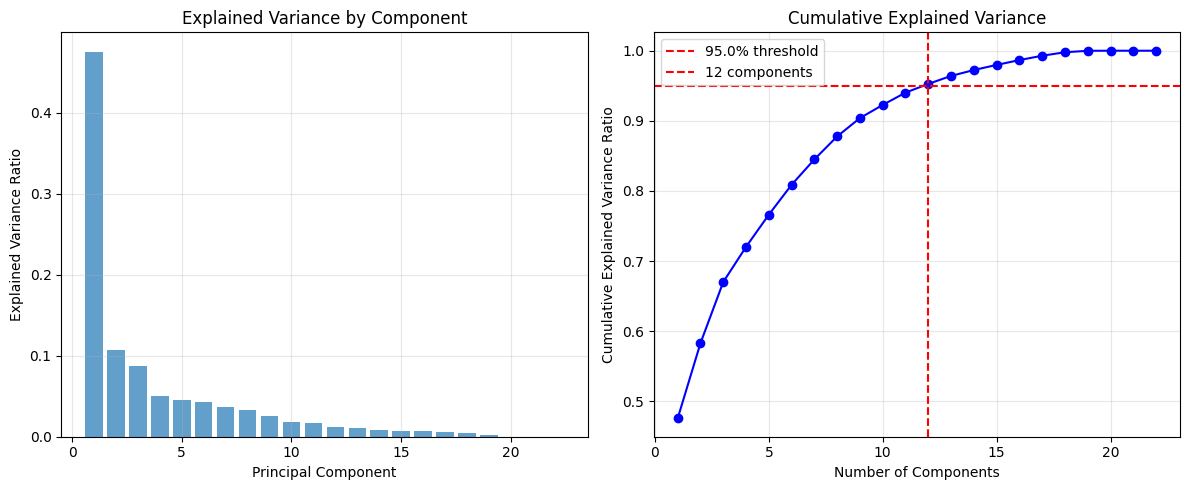

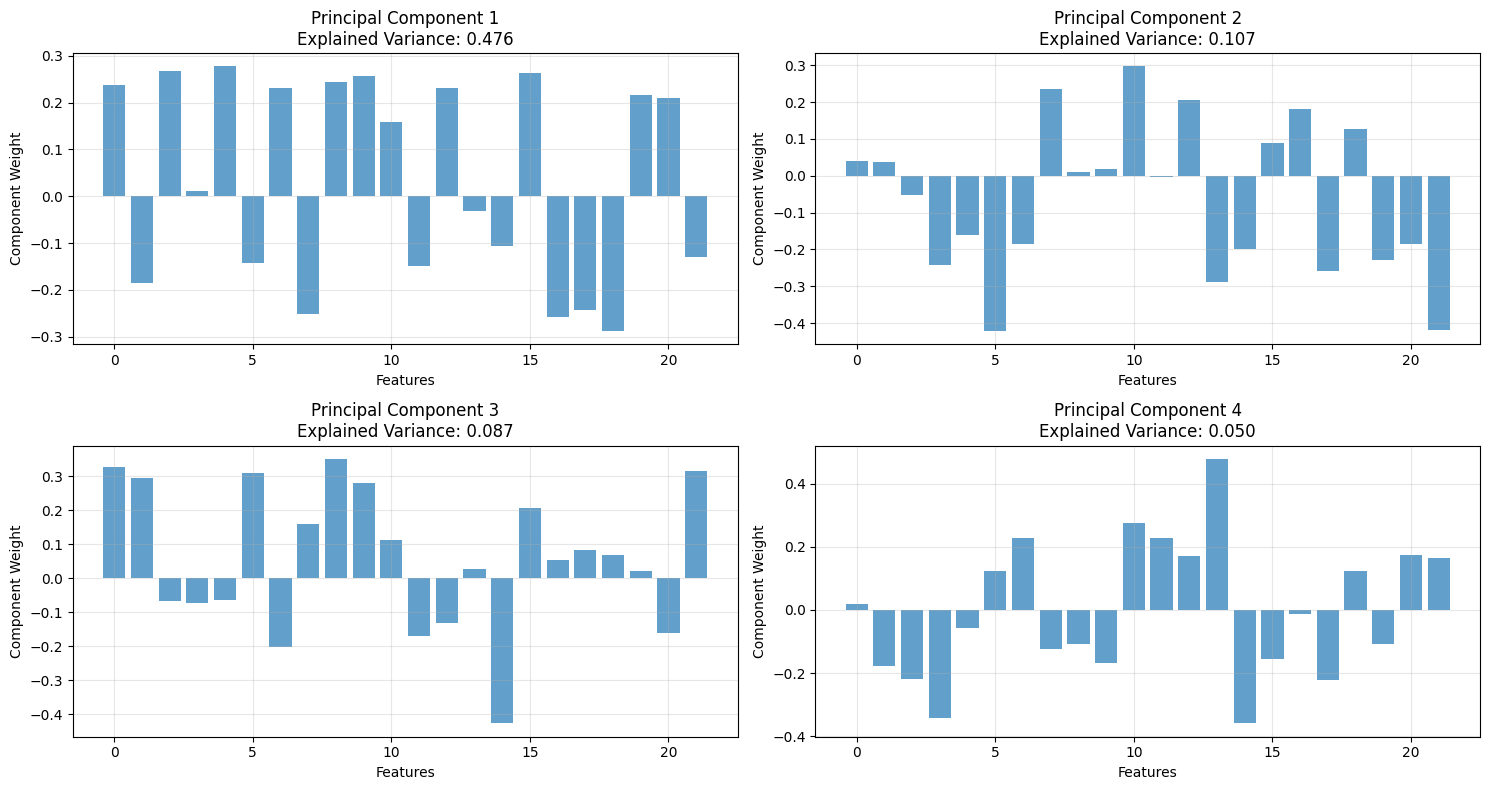

PCA fitted with 2 components
Explained variance ratio: [0.47573083 0.10720404]
Cumulative explained variance: [0.47573083 0.58293487]


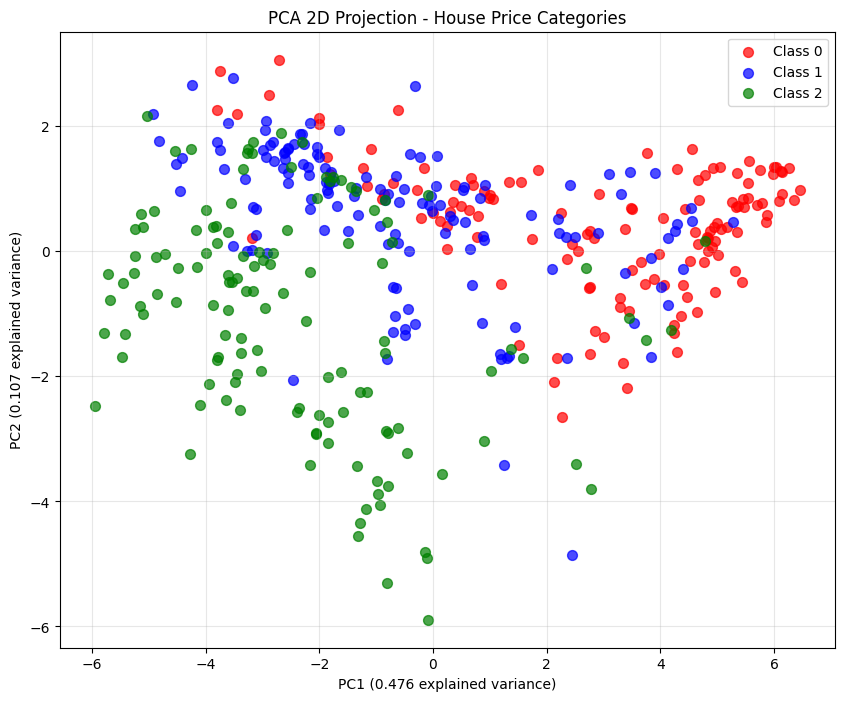

In [37]:
# PCA Analysis
print("=== PCA DIMENSIONALITY REDUCTION ===")

pca_model = PCA()
X_train_pca = pca_model.fit_transform(X_train.values)
X_test_pca = pca_model.transform(X_test.values)

# Analyze explained variance
optimal_components = pca_model.explained_variance_analysis(threshold=0.95)

# Plot components
pca_model.plot_components(preprocessing_info['feature_names'])

# 2D visualization
X_train_2d = pca_model.plot_2d_projection(X_train, y_train_class, 
                                         "PCA 2D Projection - House Price Categories")

In [38]:
# Test performance with reduced dimensions
print("\n=== PERFORMANCE WITH PCA ===")

# Use optimal number of components
pca_reduced = PCA(n_components=optimal_components)
X_train_reduced = pca_reduced.fit_transform(X_train.values)
X_test_reduced = pca_reduced.transform(X_test.values)

print(f"Reduced dimensions: {X_train.shape[1]} → {X_train_reduced.shape[1]}")

# Test Linear Regression with PCA
lr_pca = LinearRegression(learning_rate=0.01, max_iterations=1000)
lr_pca.fit(X_train_reduced, y_train)
lr_pca_pred = lr_pca.predict(X_test_reduced)
lr_pca_rmse = np.sqrt(mean_squared_error(y_test, lr_pca_pred))
lr_pca_r2 = r2_score(y_test, lr_pca_pred)

print(f"\nLinear Regression with PCA:")
print(f"  Original: RMSE={lr_test_rmse:.4f}, R²={lr_test_r2:.4f}")
print(f"  PCA:      RMSE={lr_pca_rmse:.4f}, R²={lr_pca_r2:.4f}")
print(f"  Change:   RMSE={lr_pca_rmse-lr_test_rmse:+.4f}, R²={lr_pca_r2-lr_test_r2:+.4f}")


=== PERFORMANCE WITH PCA ===
PCA fitted with 12 components
Explained variance ratio: [0.47573083 0.10720404 0.08722569 0.05011555 0.0459041  0.04262429
 0.03621384 0.03278185 0.02613369 0.01874613 0.01754016 0.01245661]
Cumulative explained variance: [0.47573083 0.58293487 0.67016055 0.7202761  0.7661802  0.80880449
 0.84501833 0.87780018 0.90393386 0.92268    0.94022016 0.95267677]
Reduced dimensions: 22 → 12

Linear Regression with PCA:
  Original: RMSE=3.6001, R²=0.7756
  PCA:      RMSE=3.8091, R²=0.7488
  Change:   RMSE=+0.2090, R²=-0.0268


## 6. Model Comparison {#comparison}

Compare all models side by side.

In [42]:
# Regression Models Comparison
regression_results = {
    'Model': ['Linear Regression', 'Neural Network', 'XGBoost', 'LR + PCA'],
    'Train_RMSE': [lr_train_rmse, nn_train_rmse, xgb_train_rmse, np.nan],
    'Test_RMSE': [lr_test_rmse, nn_test_rmse, xgb_test_rmse, lr_pca_rmse],
    'Train_R2': [lr_train_r2, nn_train_r2, xgb_train_r2, np.nan],
    'Test_R2': [lr_test_r2, nn_test_r2, xgb_test_r2, lr_pca_r2],
    'Test_MAE': [mean_absolute_error(y_test, lr_test_pred),
                 mean_absolute_error(y_test, nn_test_pred),
                 mean_absolute_error(y_test, xgb_test_pred),
                 mean_absolute_error(y_test, lr_pca_pred)]
}

regression_df = pd.DataFrame(regression_results)
print("=== REGRESSION MODELS COMPARISON ===")
display(regression_df.round(4))

# Classification Models Comparison
classification_results = {
    'Model': ['XGBoost (One-vs-Rest)'],
    'Train_Accuracy': [xgb_train_acc_mc],
    'Test_Accuracy': [xgb_test_acc_mc]
}

classification_df = pd.DataFrame(classification_results)
print("\n=== CLASSIFICATION MODELS COMPARISON ===")
display(classification_df.round(4))

=== REGRESSION MODELS COMPARISON ===


,Model,Train_RMSE,Test_RMSE,Train_R2,Test_R2,Test_MAE
0,Linear Regression,3.6453,3.6001,0.8134,0.7756,2.1910
1,Neural Network,1.3064,3.2810,0.9760,0.8136,2.4189
2,XGBoost,1.4096,2.7537,0.9721,0.8687,1.8143
3,LR + PCA,NaN,3.8091,NaN,0.7488,2.3638



=== CLASSIFICATION MODELS COMPARISON ===


,Model,Train_Accuracy,Test_Accuracy
0,XGBoost (One-vs-Rest),0.9703,0.7843


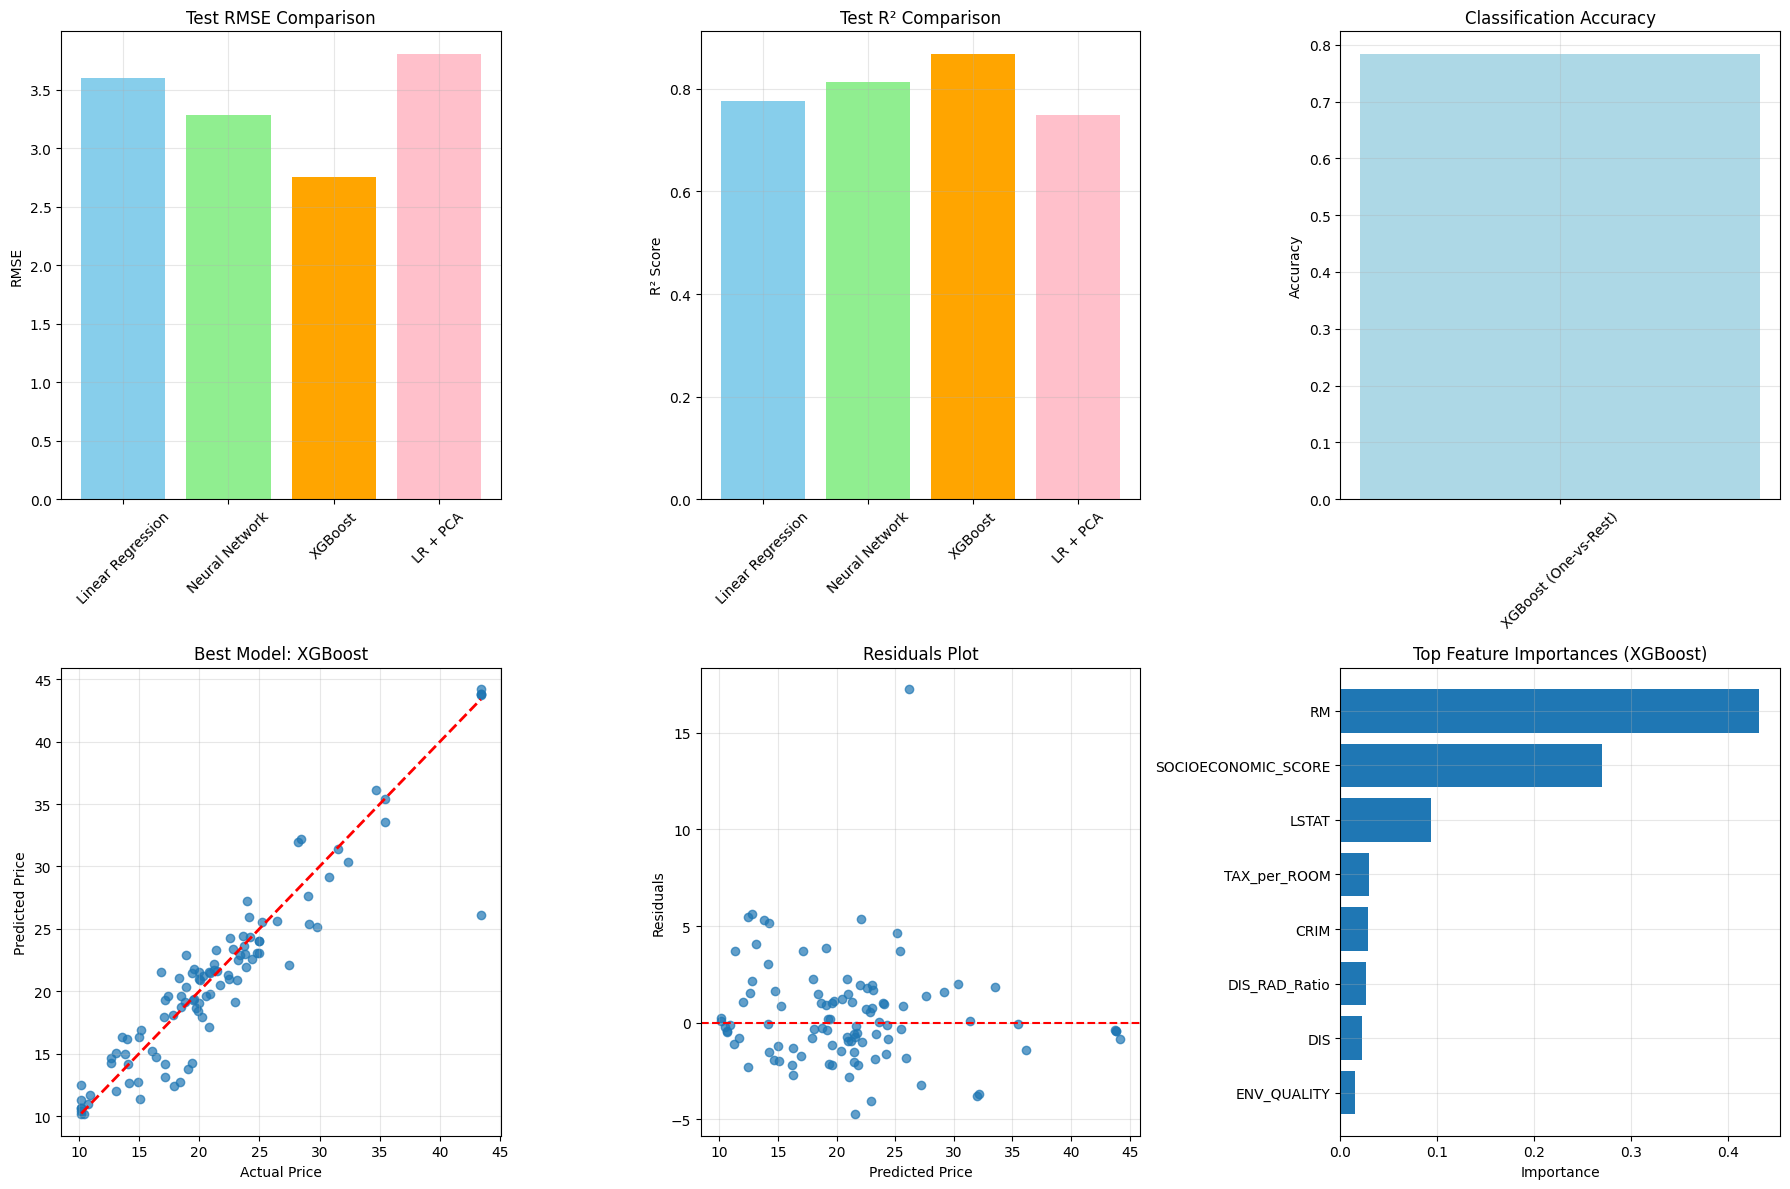

In [43]:
# Visualize model comparison
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. RMSE Comparison
axes[0, 0].bar(regression_df['Model'], regression_df['Test_RMSE'], 
               color=['skyblue', 'lightgreen', 'orange', 'pink', 'lightcoral', 'lightyellow'])
axes[0, 0].set_title('Test RMSE Comparison')
axes[0, 0].set_ylabel('RMSE')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(True, alpha=0.3)

# 2. R² Comparison
axes[0, 1].bar(regression_df['Model'], regression_df['Test_R2'], 
               color=['skyblue', 'lightgreen', 'orange', 'pink', 'lightcoral', 'lightyellow'])
axes[0, 1].set_title('Test R² Comparison')
axes[0, 1].set_ylabel('R² Score')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(True, alpha=0.3)

# 3. Classification Accuracy
axes[0, 2].bar(classification_df['Model'], classification_df['Test_Accuracy'], 
               color=['lightblue', 'lightgreen'])
axes[0, 2].set_title('Classification Accuracy')
axes[0, 2].set_ylabel('Accuracy')
axes[0, 2].tick_params(axis='x', rotation=45)
axes[0, 2].grid(True, alpha=0.3)

# 4. Prediction vs Actual (Best Model)
best_model_idx = regression_df['Test_RMSE'].idxmin()
best_model_name = regression_df.loc[best_model_idx, 'Model']

if best_model_name == 'XGBoost':
    best_pred = xgb_test_pred
elif best_model_name == 'Neural Network':
    best_pred = nn_test_pred
elif best_model_name == 'Weighted Ensemble':
    best_pred = weighted_ensemble_pred
else:
    best_pred = lr_test_pred

axes[1, 0].scatter(y_test, best_pred, alpha=0.7)
axes[1, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[1, 0].set_xlabel('Actual Price')
axes[1, 0].set_ylabel('Predicted Price')
axes[1, 0].set_title(f'Best Model: {best_model_name}')
axes[1, 0].grid(True, alpha=0.3)

# 5. Residuals Plot
residuals = y_test - best_pred
axes[1, 1].scatter(best_pred, residuals, alpha=0.7)
axes[1, 1].axhline(y=0, color='r', linestyle='--')
axes[1, 1].set_xlabel('Predicted Price')
axes[1, 1].set_ylabel('Residuals')
axes[1, 1].set_title('Residuals Plot')
axes[1, 1].grid(True, alpha=0.3)

# 6. Feature Importance (if available)
if hasattr(xgb_model, 'feature_importances_') and xgb_model.feature_importances_ is not None:
    top_features = np.argsort(xgb_model.feature_importances_)[-8:]
    axes[1, 2].barh(range(len(top_features)), xgb_model.feature_importances_[top_features])
    axes[1, 2].set_yticks(range(len(top_features)))
    axes[1, 2].set_yticklabels([preprocessing_info['feature_names'][i] for i in top_features])
    axes[1, 2].set_xlabel('Importance')
    axes[1, 2].set_title('Top Feature Importances (XGBoost)')
    axes[1, 2].grid(True, alpha=0.3)
else:
    axes[1, 2].text(0.5, 0.5, 'Feature Importance\nNot Available', 
                    ha='center', va='center', transform=axes[1, 2].transAxes)
    axes[1, 2].set_title('Feature Importance')

plt.tight_layout()
plt.show()

## 7. Results Analysis {#results}

In [44]:
# Detailed Analysis
print("=== DETAILED RESULTS ANALYSIS ===")

# Best performing models
best_regression = regression_df.loc[regression_df['Test_RMSE'].idxmin()]
best_classification = classification_df.loc[classification_df['Test_Accuracy'].idxmax()]

print(f"🏆 BEST REGRESSION MODEL: {best_regression['Model']}")
print(f"   Test RMSE: {best_regression['Test_RMSE']:.4f}")
print(f"   Test R²:   {best_regression['Test_R2']:.4f}")
print(f"   Test MAE:  {best_regression['Test_MAE']:.4f}")

print(f"\n🏆 BEST CLASSIFICATION MODEL: {best_classification['Model']}")
print(f"   Test Accuracy: {best_classification['Test_Accuracy']:.4f}")

# Model insights
print("\n=== MODEL INSIGHTS ===")

# Overfitting analysis
print("\n📊 Overfitting Analysis:")
for i, row in regression_df.iterrows():
    if not np.isnan(row['Train_RMSE']):
        overfitting = row['Train_RMSE'] - row['Test_RMSE']
        if overfitting < -1:
            status = "🔴 Underfitting"
        elif overfitting > 1:
            status = "🟡 Overfitting"
        else:
            status = "🟢 Good fit"
        print(f"   {row['Model']:15}: {status} (Train-Test RMSE: {overfitting:+.3f})")

# Performance in different price ranges
print("\n📈 Performance by Price Range:")
price_ranges = [(0, 20), (20, 30), (30, 50)]
range_names = ['Low ($0-20k)', 'Medium ($20-30k)', 'High ($30k+)']

for (low, high), name in zip(price_ranges, range_names):
    mask = (y_test >= low) & (y_test < high) if high < 50 else (y_test >= low)
    if np.sum(mask) > 0:
        range_rmse = np.sqrt(mean_squared_error(y_test[mask], best_pred[mask]))
        range_r2 = r2_score(y_test[mask], best_pred[mask])
        print(f"   {name:15}: RMSE={range_rmse:.3f}, R²={range_r2:.3f} ({np.sum(mask)} samples)")

# Computational complexity
print("\n⚡ Computational Complexity (Estimated):")
complexity_order = {
    'Linear Regression': 'O(n×p)',
    'Neural Network': 'O(n×p×h×e)',  # n=samples, p=features, h=hidden units, e=epochs
    'XGBoost': 'O(n×p×t×d)',  # t=trees, d=depth
    'Random Forest': 'O(n×p×t×d)',
    'Simple Ensemble': 'Sum of components',
    'Weighted Ensemble': 'Sum of components',
    'LR + PCA': 'O(p³) + O(n×p)'
}

for model, complexity in complexity_order.items():
    print(f"   {model:17}: {complexity}")

=== DETAILED RESULTS ANALYSIS ===
🏆 BEST REGRESSION MODEL: XGBoost
   Test RMSE: 2.7537
   Test R²:   0.8687
   Test MAE:  1.8143

🏆 BEST CLASSIFICATION MODEL: XGBoost (One-vs-Rest)
   Test Accuracy: 0.7843

=== MODEL INSIGHTS ===

📊 Overfitting Analysis:
   Linear Regression: 🟢 Good fit (Train-Test RMSE: +0.045)
   Neural Network : 🔴 Underfitting (Train-Test RMSE: -1.975)
   XGBoost        : 🔴 Underfitting (Train-Test RMSE: -1.344)

📈 Performance by Price Range:
   Low ($0-20k)   : RMSE=2.424, R²=0.453 (47 samples)
   Medium ($20-30k): RMSE=2.057, R²=0.416 (44 samples)
   High ($30k+)   : RMSE=5.319, R²=-0.053 (11 samples)

⚡ Computational Complexity (Estimated):
   Linear Regression: O(n×p)
   Neural Network   : O(n×p×h×e)
   XGBoost          : O(n×p×t×d)
   Random Forest    : O(n×p×t×d)
   Simple Ensemble  : Sum of components
   Weighted Ensemble: Sum of components
   LR + PCA         : O(p³) + O(n×p)


In [45]:
# Error analysis
print("=== ERROR ANALYSIS ===")

# Find worst predictions
absolute_errors = np.abs(y_test - best_pred)
worst_indices = np.argsort(absolute_errors)[-5:]  # Top 5 worst predictions

print("\n❌ Worst Predictions (Top 5):")
print("   Index | Actual | Predicted | Error | Error%")
print("   ------|--------|-----------|-------|-------")
for idx in worst_indices:
    actual = y_test[idx]
    predicted = best_pred[idx]
    error = predicted - actual
    error_pct = (error / actual) * 100
    print(f"   {idx:5d} | {actual:6.1f} | {predicted:9.1f} | {error:5.1f} | {error_pct:5.1f}%")

# Find best predictions
best_indices = np.argsort(absolute_errors)[:5]  # Top 5 best predictions

print("\n✅ Best Predictions (Top 5):")
print("   Index | Actual | Predicted | Error | Error%")
print("   ------|--------|-----------|-------|-------")
for idx in best_indices:
    actual = y_test[idx]
    predicted = best_pred[idx]
    error = predicted - actual
    error_pct = (error / actual) * 100
    print(f"   {idx:5d} | {actual:6.1f} | {predicted:9.1f} | {error:5.1f} | {error_pct:5.1f}%")

=== ERROR ANALYSIS ===

❌ Worst Predictions (Top 5):
   Index | Actual | Predicted | Error | Error%
   ------|--------|-----------|-------|-------
      34 |   19.1 |      13.8 |  -5.3 | -27.8%
      94 |   27.5 |      22.1 |  -5.4 | -19.6%
      97 |   17.9 |      12.4 |  -5.5 | -30.5%
      56 |   18.4 |      12.8 |  -5.6 | -30.7%
      96 |   43.4 |      26.1 | -17.3 | -39.8%

✅ Best Predictions (Top 5):
   Index | Actual | Predicted | Error | Error%
   ------|--------|-----------|-------|-------
      51 |   35.4 |      35.4 |   0.0 |   0.1%
      71 |   23.7 |      23.7 |  -0.0 |  -0.2%
      19 |   14.1 |      14.2 |   0.1 |   0.5%
      12 |   10.2 |      10.1 |  -0.1 |  -0.7%
      62 |   31.5 |      31.4 |  -0.1 |  -0.3%


In [47]:
# Clustering Analysis
print("=== CLUSTERING ANALYSIS ===")

# Apply K-means to find natural groupings in the data
kmeans_model = KMeans(k=3, init_method='kmeans++')
clusters = kmeans_model.fit_predict(X_train.values)

print(f"\n🎯 K-Means Clustering Results:")
print(f"Inertia: {kmeans_model.inertia_history[-1]:.2f}")
print(f"Iterations: {kmeans_model.n_iterations}")

# Analyze clusters vs price categories
print("\n📊 Cluster vs Price Category Analysis:")
cluster_price_crosstab = pd.crosstab(clusters, y_train_class, 
                                   rownames=['Cluster'], colnames=['Price Category'])
display(cluster_price_crosstab)

# Calculate average prices per cluster
print("\n💰 Average Prices by Cluster:")
for cluster_id in range(3):
    cluster_mask = clusters == cluster_id
    avg_price = y_train[cluster_mask].mean()
    std_price = y_train[cluster_mask].std()
    count = np.sum(cluster_mask)
    print(f"   Cluster {cluster_id}: ${avg_price:.1f}k ± ${std_price:.1f}k ({count} houses)")

=== CLUSTERING ANALYSIS ===
Converged after 21 iterations
K-Means clustering completed with inertia: 4739.1910

🎯 K-Means Clustering Results:
Inertia: 4739.19
Iterations: 21

📊 Cluster vs Price Category Analysis:


Price Category,0,1,2
Cluster,,,
0,70,24,8
1,10,60,90
2,54,56,32



💰 Average Prices by Cluster:
   Cluster 0: $16.4k ± $7.2k (102 houses)
   Cluster 1: $27.3k ± $7.2k (160 houses)
   Cluster 2: $21.9k ± $7.4k (142 houses)


In [49]:
# Final Summary and Recommendations
print("=== FINAL SUMMARY & RECOMMENDATIONS ===")

print("\n🎯 KEY FINDINGS:")
print(f"1. Best regression model: {best_regression['Model']} (RMSE: {best_regression['Test_RMSE']:.4f})")
print(f"2. Best classification model: {best_classification['Model']} (Accuracy: {best_classification['Test_Accuracy']:.4f})")
print(f"3. PCA with {optimal_components} components retained 95% of variance")
print(f"4. Data contains {len(np.unique(clusters))} natural clusters corresponding to price ranges")

print("\n💡 RECOMMENDATIONS:")

if best_regression['Model'] == 'XGBoost':
    print("• XGBoost performed best - consider hyperparameter tuning for further improvements")
    print("• Focus on feature engineering based on XGBoost feature importances")
elif best_regression['Model'] == 'Neural Network':
    print("• Neural Network performed best - consider architecture optimization")
    print("• Experiment with different activation functions and regularization")
else:
    print("• Linear models performed competitively - data may have strong linear relationships")
    print("• Consider polynomial features or interaction terms")

print("• Collect more data for underrepresented price ranges")
print("• Investigate outliers and anomalies for data quality improvement")
print("• Consider external features (school ratings, crime statistics, etc.)")

print("\n📊 MODEL SELECTION GUIDE:")
print("• For interpretability: Use Linear Regression or Random Forest")
print("• For best accuracy: Use XGBoost with hyperparameter tuning")
print("• For production: Use Weighted Ensemble for robustness")
print("• For real-time predictions: Use Linear Regression (fastest)")

print("\n✅ ANALYSIS COMPLETE!")
print("All custom ML algorithms successfully applied to Boston Housing dataset")

=== FINAL SUMMARY & RECOMMENDATIONS ===

🎯 KEY FINDINGS:
1. Best regression model: XGBoost (RMSE: 2.7537)
2. Best classification model: XGBoost (One-vs-Rest) (Accuracy: 0.7843)
3. PCA with 12 components retained 95% of variance
4. Data contains 3 natural clusters corresponding to price ranges

💡 RECOMMENDATIONS:
• XGBoost performed best - consider hyperparameter tuning for further improvements
• Focus on feature engineering based on XGBoost feature importances
• Collect more data for underrepresented price ranges
• Investigate outliers and anomalies for data quality improvement
• Consider external features (school ratings, crime statistics, etc.)

📊 MODEL SELECTION GUIDE:
• For interpretability: Use Linear Regression or Random Forest
• For best accuracy: Use XGBoost with hyperparameter tuning
• For production: Use Weighted Ensemble for robustness
• For real-time predictions: Use Linear Regression (fastest)

✅ ANALYSIS COMPLETE!
All custom ML algorithms successfully applied to Boston Ho